# Customer Segmentation / Clustering


### importing libraries


In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA




### Load the datasets

In [26]:

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')



### Merge the datasets on CustomerID

In [27]:

merged_df = pd.merge(transactions, customers, on='CustomerID')

merged_df.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04


In [28]:
### Feature engineering

In [29]:

# Total value spent by each customer
customer_spend = merged_df.groupby('CustomerID')['TotalValue'].sum()

# Frequency of transactions by each customer
customer_frequency = merged_df.groupby('CustomerID').size()

# Recency of the last transaction (most recent date)
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
recency = merged_df.groupby('CustomerID')['TransactionDate'].max()
recency = (pd.to_datetime('today') - recency).dt.days  # Recency in days

# Merge the features into a single DataFrame
customer_features = pd.DataFrame({
    'TotalSpend': customer_spend,
    'Frequency': customer_frequency,
    'Recency': recency
})
print(customer_features)


            TotalSpend  Frequency  Recency
CustomerID                                
C0001          3354.52          5       82
C0002          1862.74          4       51
C0003          2725.38          4      152
C0004          5354.88          8       31
C0005          2034.24          3       80
...                ...        ...      ...
C0196          4982.88          4       39
C0197          1928.65          3       27
C0198           931.83          2      111
C0199          1979.28          4       89
C0200          4758.60          5       43

[199 rows x 3 columns]


In [30]:
# Standardize the features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features_scaled)
    inertia.append(kmeans.inertia_)
print(inertia)

C:\Users\hp\anaconda43\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda43\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda43\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda43\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

[352.9133694620852, 231.54763533024087, 180.6692151178581, 166.63456292436953, 136.19415177973988, 127.46483421672224, 106.82723226968525, 99.70189858305889, 92.94857547909271]


C:\Users\hp\anaconda43\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


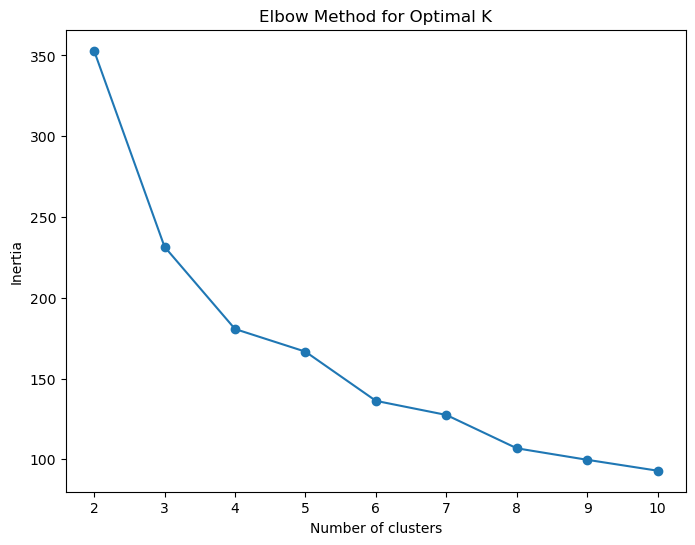

In [31]:

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



C:\Users\hp\anaconda43\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.8803333792626153


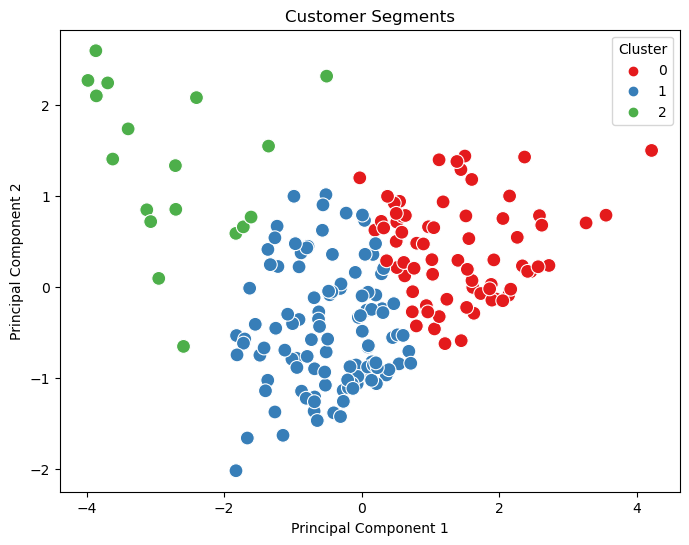

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customer_features_scaled)

# Add the cluster labels to the customer_features DataFrame
customer_features['Cluster'] = kmeans.labels_

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(customer_features_scaled, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')

# Visualize the clusters using PCA (2D projection)
pca = PCA(n_components=2)
customer_features_pca = pca.fit_transform(customer_features_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_features_pca[:, 0], y=customer_features_pca[:, 1], hue=customer_features['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()



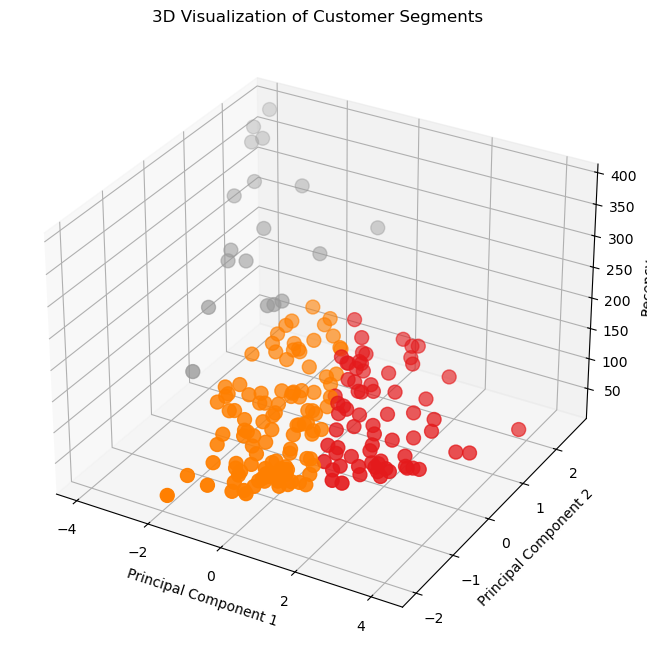

In [36]:
# Visualize the clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(customer_features_pca[:, 0], customer_features_pca[:, 1], customer_features['Recency'], c=customer_features['Cluster'], cmap='Set1', s=100)
ax.set_title('3D Visualization of Customer Segments')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Recency')
plt.show()

# Create a report of clustering results
report = {
    'Number of Clusters': 3,
    'Davies-Bouldin Index': db_index,
    'Cluster Centers': kmeans.cluster_centers_,
    'Cluster Distribution': customer_features['Cluster'].value_counts()
}



In [37]:
# Save the report as a PDF (optional, can be exported using ReportLab or other libraries)
import fpdf
pdf = fpdf.FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)

pdf.cell(200, 10, txt="Customer Segmentation Clustering Report", ln=True, align='C')
pdf.cell(200, 10, txt=f"Number of Clusters: {report['Number of Clusters']}", ln=True)
pdf.cell(200, 10, txt=f"Davies-Bouldin Index: {report['Davies-Bouldin Index']:.4f}", ln=True)
pdf.cell(200, 10, txt=f"Cluster Centers: {report['Cluster Centers']}", ln=True)
pdf.cell(200, 10, txt=f"Cluster Distribution: {report['Cluster Distribution'].to_dict()}", ln=True)

# Save the PDF
pdf.output("dcustomer_Segmentation_Report.pdf")

''